# `spaxelsleuth` examples (LZIFU)
---
In this notebook, you will learn how to use `spaxelsleuth` to 
1. create a `pandas` DataFrame containing spaxel-by-spaxel information for a galaxies that was fitted with LZIFU;
2. use the included plotting tools to analyse the LZIFU data;
3. create plots that you can use to analyse specific galaxies. 

In [1]:
from spaxelsleuth import load_user_config
load_user_config("/home/u5708159/.spaxelsleuthconfig.json")
from spaxelsleuth.config import settings

## Create the DataFrames
---

### Creating the LZIFU DataFrame
The first step is to create the DataFrame containing all measured quantities, such as emission line fluxes, stellar and gas kinematics, and extinction, for each individual spaxel in galaxies that have been fitted with LZIFU. Each time this is run, it saves one copy of the DataFrame where the extinction correction has been applied, and one without. The resulting DataFrames are saved to file and can be accessed using `load_lzifu_df()`.

The input arguments are as follows:
* `ncomponents` determines which data set the function is run on. 
    * `ncomponents = "merge"` will use the data products produced using the multi-component Gaussian emission line fits, where the optimum number of components in each spaxel is determined via the likelihood ratio test as per Ho et al. (2016);
    * `ncomponents = "1"`, `"2"` or `"3"` will use the data products produced using the 1, 2 or 3-component Gaussian emission line fits.
* `bin_type` refers to the spatial binning scheme used. For now, only unbinned data (`"default"`) is accepted.
* `eline_SNR_min` gives the minimum S/N for which a fitted emission line component will be accepted. All quantities associated with emission line components that fall below this S/N threshold (e.g. kinematics, fluxes, etc.) will be set to `np.nan`.

In [2]:
from spaxelsleuth.loaddata.lzifu import make_lzifu_df

In [18]:
# First, check which galaxies we have fitted with LZIFU.
import os
gals = [int(f.split("_")[0]) for f in os.listdir(settings["lzifu"]["input_path"]) if f.endswith("1_comp.fits") and not f.startswith(".")]
print(gals)

[934, 12680327009387, 12690828005455, 13700884001977, 12690572703322, 13681104407829, 12690199005037, 5121, 901028857804452, 4237, 11671234311331]


In [11]:
make_lzifu_df(gals=gals,
              ncomponents=1,
              bin_type="default",
              eline_SNR_min=3,
              sigma_gas_SNR_min=1,
              line_flux_SNR_cut=False,
              missing_fluxes_cut=False,
              line_amplitude_SNR_cut=False,
              flux_fraction_cut=False,
              sigma_gas_SNR_cut=False,
              vgrad_cut=False,
              stekin_cut=False,
              correct_extinction=False,
              metallicity_diagnostics=[
                  "N2Ha_PP04",
              ],
              sigma_inst_kms=29.6,
              nthreads=1)


In lzifu.make_lzifu_df() [ncomponents=1, bin_type=default, eline_SNR_min=3]: Running sequentially...


/home/u5708159/.conda/envs/py37/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/u5708159/.conda/envs/py37/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/u5708159/.conda/envs/py37/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/u5708159/.conda/envs/py37/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/u5708159/.conda/envs/py37/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/u5708159/.conda/envs/py37/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/u5708159/.

////////////////////////////////////////////////////////////////////
In dqcut.set_flags(): Flagging low S/N components and spaxels...
In dqcut.set_flags(): Flagging components and spaxels with NaN fluxes and finite errors...
OII3726 (component 1): 0 spaxels have missing fluxes in this component
OII3726 (total): 14 spaxels have missing total fluxes
OII3729 (component 1): 0 spaxels have missing fluxes in this component
OII3729 (total): 16 spaxels have missing total fluxes
HEPSILON (component 1): 0 spaxels have missing fluxes in this component
HEPSILON (total): 5 spaxels have missing total fluxes
HDELTA (component 1): 0 spaxels have missing fluxes in this component
HDELTA (total): 1 spaxels have missing total fluxes
HGAMMA (component 1): 0 spaxels have missing fluxes in this component
HGAMMA (total): 10 spaxels have missing total fluxes
HBETA (component 1): 0 spaxels have missing fluxes in this component
HBETA (total): 4 spaxels have missing total fluxes
OIII5007 (component 1): 0 spaxels 

/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/dqcut.py:592: UserWarning: using only sigma_gas to define 'missing components'...
  warnings.warn("using only sigma_gas to define 'missing components'...")
/home/u5708159/.conda/envs/py37/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/u5708159/.conda/envs/py37/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/home/u5708159/.conda/envs/py37/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In calculate_metallicity(N2Ha_PP04, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Removing column suffixes...
In calculate_metallicity(N2Ha_PP04, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Computing metallicities with errors...
In _get_metallicity(): able to calculate N2Ha_PP04 log(O/H) + 12  in 1813/10768 (16.84%) of rows


100%|██████████| 1000/1000 [00:02<00:00, 393.26it/s]
/home/u5708159/.conda/envs/py37/lib/python3.7/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'default1-comp'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


In _get_metallicity(): Concatenating DataFrames...
In _get_metallicity(): Done!
In calculate_metallicity(N2Ha_PP04, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Adding column suffixes...
In calculate_metallicity(N2Ha_PP04, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Done! Total time = 0:0:2.67349
In lzifu.make_lzifu_df() [ncomponents=1, bin_type=default, eline_SNR_min=3]: Saving to file lzifu_default_1-comp_minSNR=3.hd5...


/home/u5708159/.conda/envs/py37/lib/python3.7/site-packages/pandas/core/generic.py:2718: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->Index(['x, y (pixels)'], dtype='object')]

  encoding=encoding,


In lzifu.make_lzifu_df() [ncomponents=1, bin_type=default, eline_SNR_min=3]: Finished!


### Load the LZIFU DataFrame we just created

In [3]:
from spaxelsleuth.loaddata.lzifu import load_lzifu_df

df = load_lzifu_df(
    ncomponents=1,
    bin_type="default",
    correct_extinction=False,
    eline_SNR_min=3,
)

In load_lzifu_df(): Loading DataFrame from file /priv/meggs3/u5708159/LZIFU/spaxelsleuth/lzifu_default_1-comp_minSNR=3.hd5 [last modified 2023-08-24 13:14:24.783994]...
In load_lzifu_df(): Finished!


In addition to the measured quantities released in DR3, the DataFrame also contains various other measurements, such as line ratios, spectral categories, equivalent widths, and the like:

In [4]:
df

,v_gas (component 1),v_gas error (component 1),sigma_gas (component 1),sigma_gas error (component 1),OII3726 (total),OII3726 error (total),OII3726 (component 1),OII3726 error (component 1),OII3729 (total),OII3729 error (total),...,flux_fraction_cut,vgrad_cut,sigma_gas_SNR_cut,stekin_cut,"x, y (pixels)",survey,ncomponents,bin_type,debug,BPT (total)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,"(15.00000000000012, 11.000000000000089)",lzifu,1,default,False,Not classified
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,"(16.000000000000128, 11.000000000000089)",lzifu,1,default,False,Not classified
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,"(18.000000000000142, 11.000000000000089)",lzifu,1,default,False,Not classified
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,"(19.000000000000153, 11.000000000000089)",lzifu,1,default,False,Not classified
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,"(21.000000000000167, 11.000000000000089)",lzifu,1,default,False,Not classified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,"(31.00000000000025, 45.00000000000036)",lzifu,1,default,False,Not classified
10764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,"(32.000000000000256, 45.00000000000036)",lzifu,1,default,False,Not classified
10765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,"(33.00000000000026, 45.00000000000036)",lzifu,1,default,False,Not classified
10766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,"(32.000000000000256, 46.00000000000037)",lzifu,1,default,False,Not classified


In [14]:
for col in df.columns:
    print(col)

v_gas (component 1)
v_gas error (component 1)
sigma_gas (component 1)
sigma_gas error (component 1)
OII3726 (total)
OII3726 error (total)
OII3726 (component 1)
OII3726 error (component 1)
OII3729 (total)
OII3729 error (total)
OII3729 (component 1)
OII3729 error (component 1)
HEPSILON (total)
HEPSILON error (total)
HEPSILON (component 1)
HEPSILON error (component 1)
HDELTA (total)
HDELTA error (total)
HDELTA (component 1)
HDELTA error (component 1)
HGAMMA (total)
HGAMMA error (total)
HGAMMA (component 1)
HGAMMA error (component 1)
HBETA (total)
HBETA error (total)
HBETA (component 1)
HBETA error (component 1)
OIII5007 (total)
OIII5007 error (total)
OIII5007 (component 1)
OIII5007 error (component 1)
OI6300 (total)
OI6300 error (total)
OI6300 (component 1)
OI6300 error (component 1)
HALPHA (total)
HALPHA error (total)
HALPHA (component 1)
HALPHA error (component 1)
NII6583 (total)
NII6583 error (total)
NII6583 (component 1)
NII6583 error (component 1)
SII6716 (total)
SII6716 error (total

In [5]:
# Calculate the number of spaxels with different spectral classifications 
n_spaxels_tot = df.shape[0]
spec_cats = df["BPT (total)"].unique()  # List of spectral categories in the data set
for spec_cat in spec_cats:
    cond = df["BPT (total)"] == spec_cat
    n_spaxels = df[cond].shape[0]
    print(f"There are {n_spaxels} spaxels ({n_spaxels / n_spaxels_tot * 100:.2f}%) classified as {spec_cat}")

There are 8236 spaxels (76.49%) classified as Not classified
There are 531 spaxels (4.93%) classified as Ambiguous
There are 51 spaxels (0.47%) classified as LINER
There are 1813 spaxels (16.84%) classified as SF
There are 83 spaxels (0.77%) classified as Composite
There are 54 spaxels (0.50%) classified as Seyfert


Text(0, 0.5, '$N$')

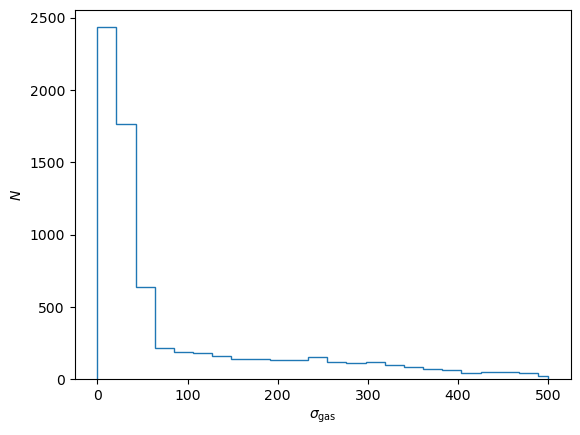

In [6]:
# Histograms showing the distribution in velocity dispersion
import matplotlib.pyplot as plt
from astropy.visualization import hist
fig, ax = plt.subplots(nrows=1, ncols=1)
hist(df[f"sigma_gas (component 1)"].values, bins="scott", ax=ax, range=(0, 500), density=False, histtype="step")
ax.set_xlabel(r"$\sigma_{\rm gas}$")
ax.set_ylabel(r"$N$")

You can also select a subset of the full data sample as follows:

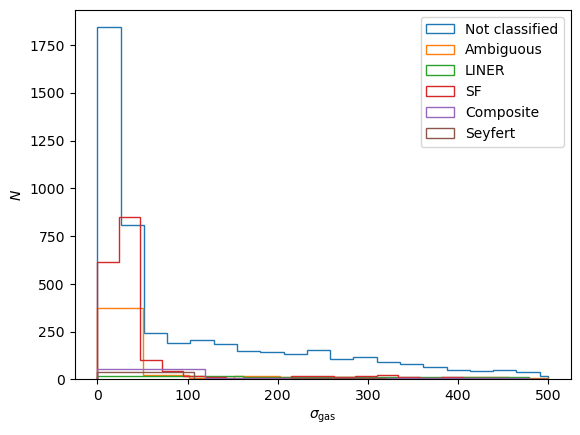

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1)
for cat in df["BPT (total)"].unique():
    df_cat = df[df["BPT (total)"] == cat]
    hist(df_cat[f"sigma_gas (component 1)"].values, bins="scott", ax=ax, range=(0, 500), density=False, histtype="step", label=cat)
ax.set_xlabel(r"$\sigma_{\rm gas}$")
ax.set_ylabel(r"$N$")
ax.legend()

## Using `spaxelsleuth.plotting`
--- 
In the below cells, we will demonstrate how to use various functions in `spaxelsleuth.plotting` to make different kinds of plots useful for analysing the data set.

In [9]:
%matplotlib widget

In [10]:
from spaxelsleuth.plotting.plottools import plot_empty_BPT_diagram, plot_BPT_lines
from spaxelsleuth.plotting.plotgalaxies import plot2dhistcontours, plot2dscatter

#### Plot the distribution of spaxels in the WHAN diagram
The WHAN diagram, developed by Cid Fernandes et al. (2010, 2011), plots the H$\alpha$ equivalent width (EW) against the [NII]6583Å/H$\alpha$ line ratio, and can be used to distinguish between emission by star formation, AGN and hot, low-mass evolved stars.

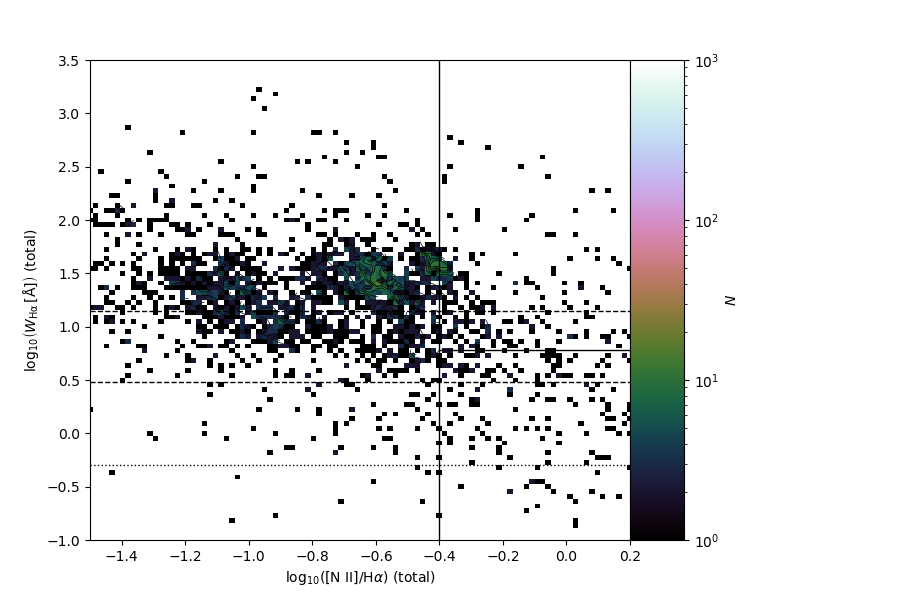

In [11]:
# Plot a 2D histogram showing the distribution of SAMI spaxels in the WHAN diagram
_ = plot2dhistcontours(df=df,
              col_x=f"log N2 (total)",
              col_y=f"log HALPHA EW (total)",
              col_z="count", log_z=True,
              plot_colorbar=True)

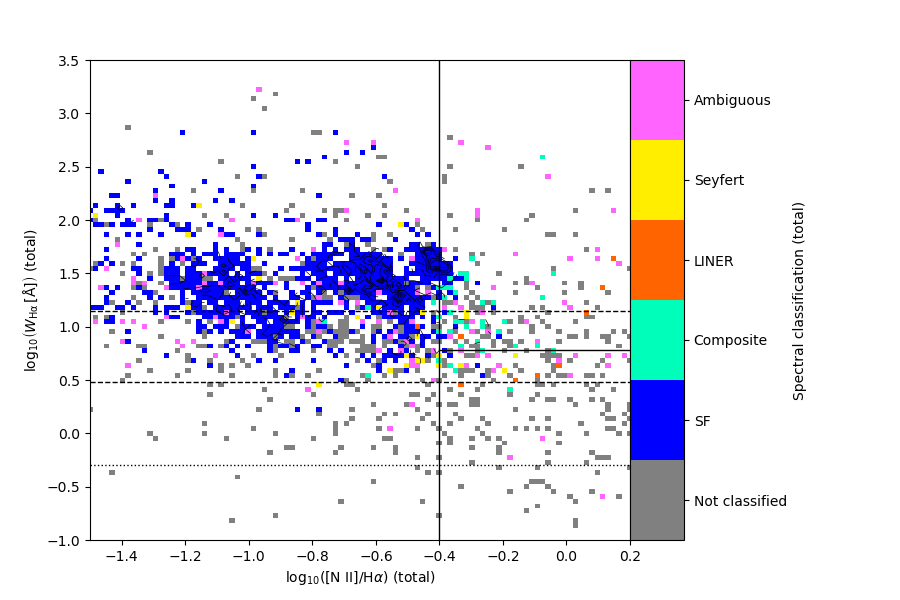

In [12]:
# Repeat the above, but colour by the median BPT classification
_ = plot2dhistcontours(df=df,
              col_x=f"log N2 (total)",
              col_y=f"log HALPHA EW (total)",
              col_z="BPT (total)", 
              plot_colorbar=True)

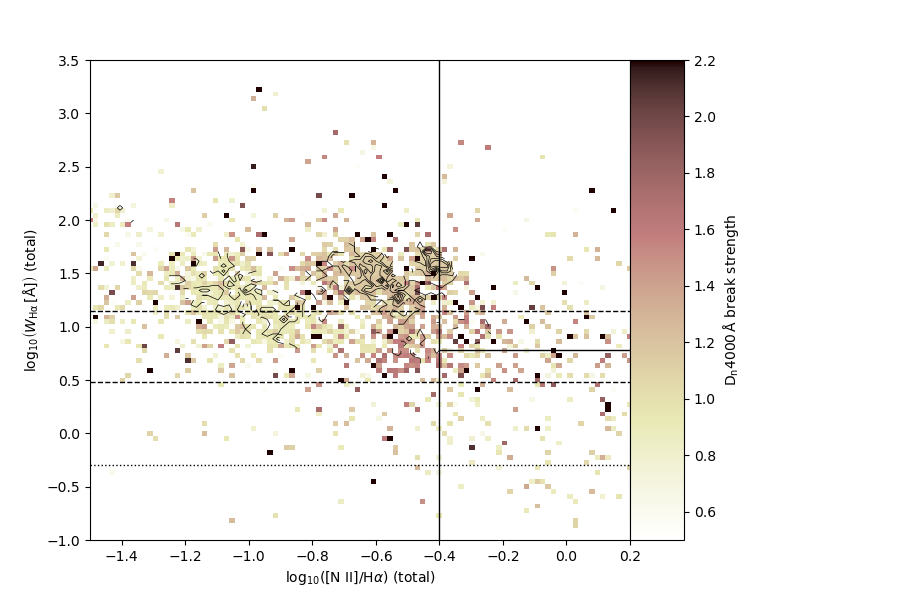

In [13]:
# Repeat the above, but colour by the D4000Å break strength
_ = plot2dhistcontours(df=df,
              col_x=f"log N2 (total)",
              col_y=f"log HALPHA EW (total)",
              col_z="D4000", 
              plot_colorbar=True)

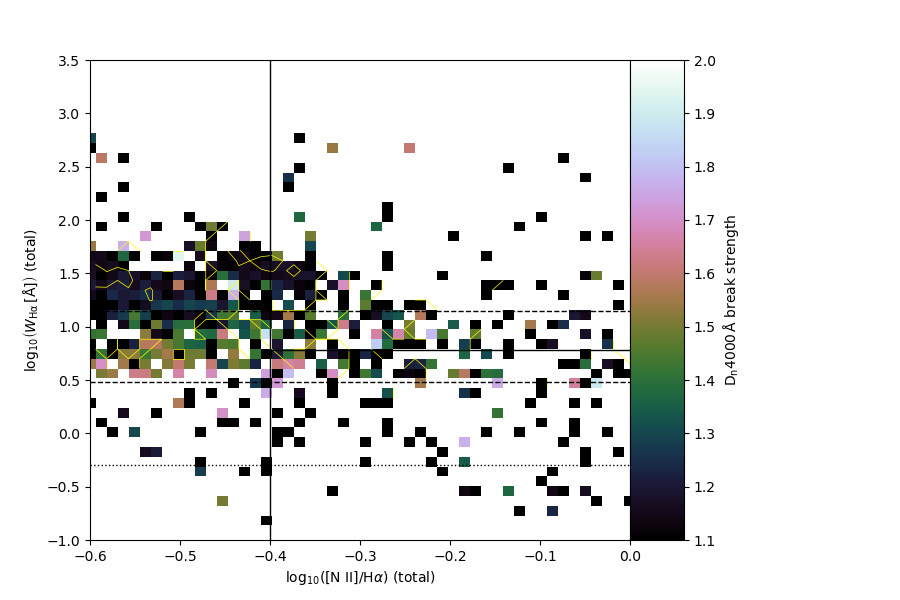

In [14]:
# If we like, we can use a different colourmap using the "cmap" keyword.
# The contour colours can also be changed using the "colors" keyword, and the levels can be changed using "levels".
# The axis limits can also be changed using the "xmin", "xmax", "ymin", "ymax" and "vmin", "vmax" keyword.
# We can also change the number of histogram bins using the "nbins" keyword.
import numpy as np
_ = plot2dhistcontours(df=df,
              col_x=f"log N2 (total)", xmin=-0.6, xmax=0.0,
              col_y=f"log HALPHA EW (total)", 
              col_z="D4000", vmin=1.1, vmax=2.0,
              nbins=50, 
              cmap="cubehelix", colors="yellow", levels=np.logspace(0, 4, 5),
              plot_colorbar=True)

#### Plot optical diagnostic ("BPT") diagrams for the full sample, showing the distribution of spaxels in all SAMI galaxies

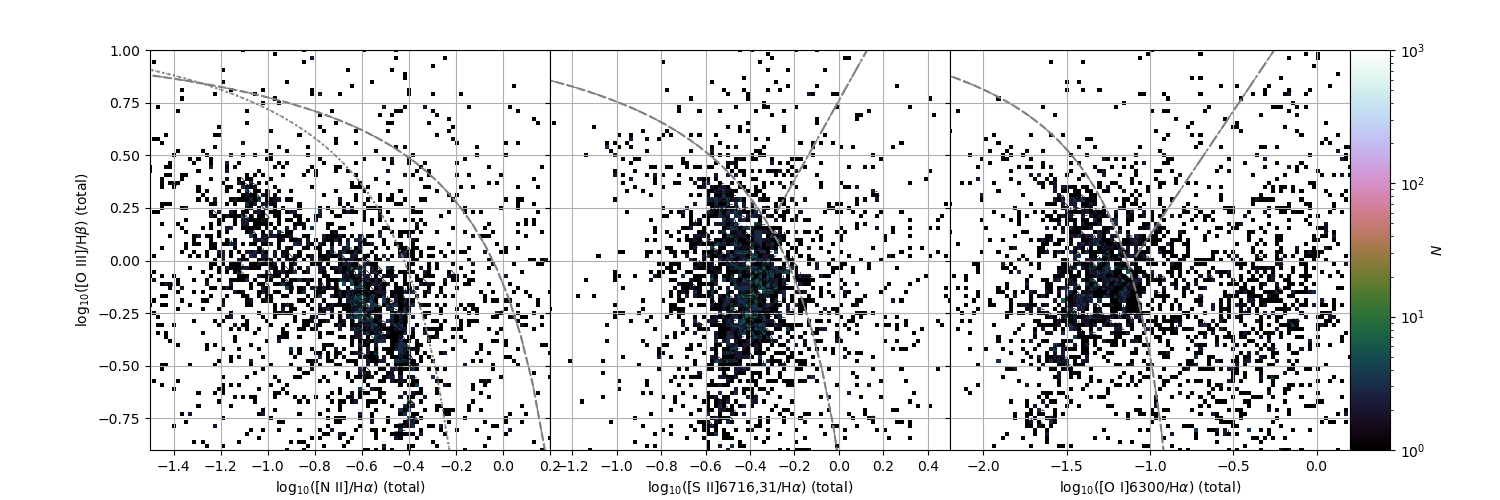

In [15]:
# Plot an empty BPT diagram
fig, axs_bpt = plot_empty_BPT_diagram(nrows=1)

# Plot 2D histograms showing the distribution of the entire sample
for cc, col_x in enumerate(["log N2", "log S2", "log O1"]):
    # Add BPT demarcation lines
    plot_BPT_lines(ax=axs_bpt[cc], col_x=col_x)    

    # Plot histograms showing distribution for whole sample
    _ = plot2dhistcontours(df=df,
                  col_x=f"{col_x} (total)",
                  col_y=f"log O3 (total)",
                  col_z="count", log_z=True,
                  ax=axs_bpt[cc],
                  cax=None,
                  plot_colorbar=True if cc==2 else False)

    if cc > 0:
        axs_bpt[cc].set_ylabel("")
    axs_bpt[cc].grid()

#### Repeat the above, but colour the histograms by $\sigma_{\rm gas}$

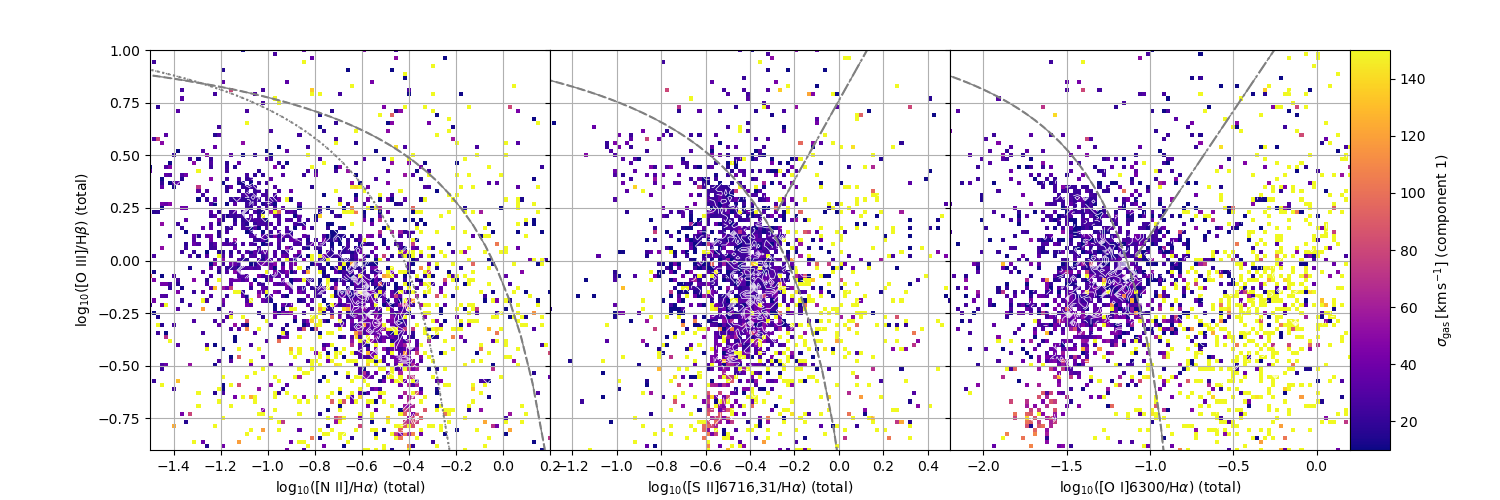

In [16]:
# Plot an empty BPT diagram
fig, axs_bpt = plot_empty_BPT_diagram(nrows=1)

# Plot 2D histograms showing the distribution of the entire sample
for cc, col_x in enumerate(["log N2", "log S2", "log O1"]):
    # Add BPT demarcation lines
    plot_BPT_lines(ax=axs_bpt[cc], col_x=col_x)    

    # Plot histograms showing distribution for whole sample
    _ = plot2dhistcontours(df=df,
                  col_x=f"{col_x} (total)",
                  col_y=f"log O3 (total)",
                  col_z="sigma_gas (component 1)", 
                  vmax=150,  # Tweak the z-axis scaling to bring out details 
                  ax=axs_bpt[cc],
                  cax=None, colors="white",
                  plot_colorbar=True if cc==2 else False)
    
    if cc > 0:
        axs_bpt[cc].set_ylabel("")
    axs_bpt[cc].grid()

## Using `spaxelsleuth.plotting` to plot individual galaxies
--- 
In the below cells, we will demonstrate how create plots based on individual SAMI galaxies using functions in `spaxelsleuth.plotting`.


In [21]:
gal = gals[2]

#### Plot 2D maps showing various quantities in this galaxy
Given a DataFrame corresponding to a single galaxy, `plot2dmap()` reconstructs a 2D image of a specified column (e.g., velocity dispersion) from the rows and plots it. 

/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/plotting/plot2dmap.py:225: UserWarning: x0_px and y0_px were not found in the DataFrame so I am assuming their values from the shape of the data
  warnings.warn("x0_px and y0_px were not found in the DataFrame so I am assuming their values from the shape of the data")


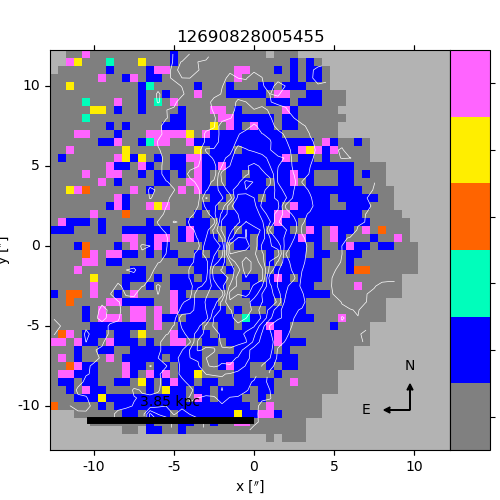

In [22]:
from spaxelsleuth.plotting.plot2dmap import plot2dmap
fig, ax = plot2dmap(df=df, gal=gal, col_z="BPT (total)")

/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/plotting/plot2dmap.py:225: UserWarning: x0_px and y0_px were not found in the DataFrame so I am assuming their values from the shape of the data
  warnings.warn("x0_px and y0_px were not found in the DataFrame so I am assuming their values from the shape of the data")


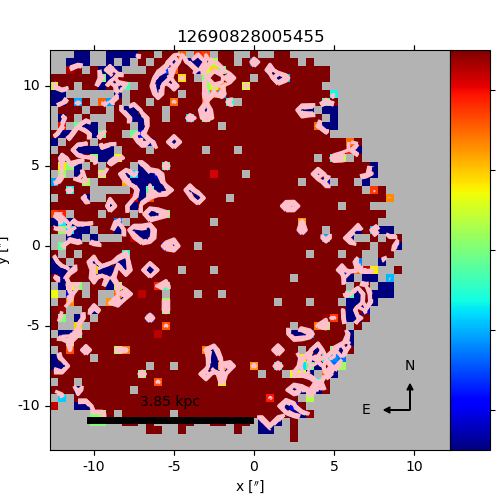

In [23]:
# Playing with input arguments 
# As in plot2dhistcontours, the maximum colour scaling can be set using "vmin" and "vmax" and the colourmap can be changed using "cmap". 
# The quantity that is used to plot contours can be set to any column in the DataFrame using "col_z_contours" and the colours and linewidths can be configured using "colours" and "linewidths".
_ = plot2dmap(df=df, gal=gal, col_z="v_gas (component 1)",
              cmap="jet", vmin=-50, vmax=+50,
              col_z_contours="v_gas (component 1)", levels=[-40, -20, 0, 20, 40], colors="pink", linewidths=2.5)


#### Scatter plots 
Create a BPT diagram with 2D histograms and contours showing the distribution in the full sample, with the data points from this galaxy overlaid on top using a scatter plot.

/home/u5708159/.conda/envs/py37/lib/python3.7/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/home/u5708159/.conda/envs/py37/lib/python3.7/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/home/u5708159/.conda/envs/py37/lib/python3.7/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/home/u5708159/.conda/envs/py37/lib/python3.7/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/home/u5708159/.conda/envs/py37/lib/python3.7/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/home/u5708159/.conda/envs/py37/lib/python3.7/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked el

[Text(0, 0.5, ''), Text(0, 0.5, '')]

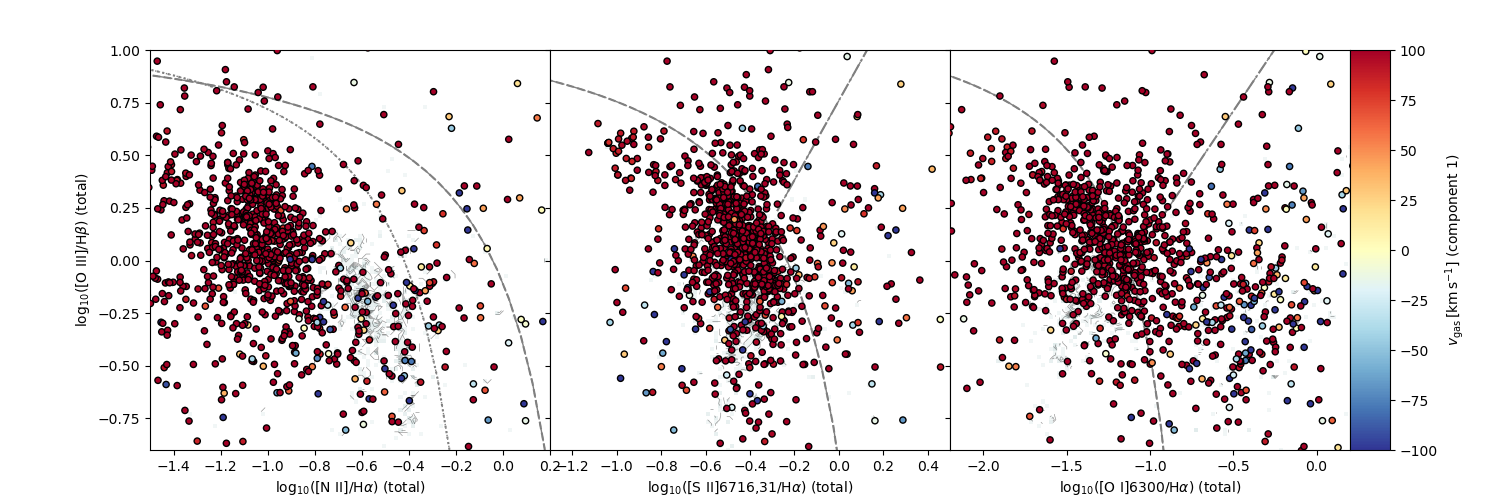

In [24]:
# Plot an empty BPT diagram
fig, axs_bpt = plot_empty_BPT_diagram(nrows=1)

# Plot 2D histograms showing the distribution of the entire sample
for cc, col_x in enumerate(["log N2", "log S2", "log O1"]):
    # Add BPT demarcation lines
    plot_BPT_lines(ax=axs_bpt[cc], col_x=col_x)    

    # Plot histograms showing distribution for whole sample
    _ = plot2dhistcontours(df=df,
                  col_x=f"{col_x} (total)",
                  col_y=f"log O3 (total)",
                  col_z="count", log_z=True,
                  cmap="bone_r", alpha=0.4,
                  ax=axs_bpt[cc],
                  plot_colorbar=False)
    
    # Scatter plot for this galaxy
    _ = plot2dscatter(df=df, gal=gal, 
                      col_x=f"{col_x} (total)",
                      col_y=f"log O3 (total)",
                      col_z=f"v_gas (component 1)",
                      ax=axs_bpt[cc],
                      vmin=-100, vmax=+100,
                      plot_colorbar=True if cc==2 else False)
    
# Turn of y-axis labels 
[ax.set_ylabel("") for ax in axs_bpt[1:]]